In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/soil_fertility.csv')
data.head()

,N,P,K,ph,ec,fertility
0,138,8.6,560,7.46,0.62,0
1,213,7.5,338,7.62,0.75,0
2,163,9.6,718,7.59,0.51,0
3,157,6.8,475,7.64,0.58,0
4,270,9.9,444,7.63,0.40,1


In [3]:
data1 = data.drop(data[data['fertility'] == 2].index)
print(data1)
print(data['fertility'].value_counts())

       N     P    K    ph    ec  fertility
0    138   8.6  560  7.46  0.62          0
1    213   7.5  338  7.62  0.75          0
2    163   9.6  718  7.59  0.51          0
3    157   6.8  475  7.64  0.58          0
4    270   9.9  444  7.63  0.40          1
..   ...   ...  ...   ...   ...        ...
874  326  10.3  507  7.88  0.71          1
875  351  10.7  623  7.96  0.51          1
876  264   9.0  486  7.24  0.47          1
877  276   9.2  370  7.62  0.62          1
879  264  10.3  475  7.49  0.74          0

[843 rows x 6 columns]
1    431
0    412
2     37
Name: fertility, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Code starts here
df = data1
print(df.head())
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=6)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

     N    P    K    ph    ec  fertility
0  138  8.6  560  7.46  0.62          0
1  213  7.5  338  7.62  0.75          0
2  163  9.6  718  7.59  0.51          0
3  157  6.8  475  7.64  0.58          0
4  270  9.9  444  7.63  0.40          1
(843, 5)
(843,)
(674, 5)
(169, 5)
(674,)
(169,)


In [5]:
num_columns = ['N','P','K','ph','ec']
# Import packages
from sklearn.preprocessing import MinMaxScaler

# Code starts here
normalizer = MinMaxScaler()
normalizer.fit(X_train[num_columns])
X_train[num_columns] = normalizer.transform(X_train[num_columns])
X_test[num_columns] = normalizer.transform(X_test[num_columns])
print(X_train.head())
print(X_test.head())

            N         P         K        ph        ec
288  0.881402  0.034195  0.650685  0.711340  0.734177
201  0.525606  0.038365  0.433790  0.671134  0.556962
10   0.390836  0.043369  0.614155  0.689691  0.443038
357  0.525606  0.035863  0.505708  0.645361  0.379747
824  0.474394  0.743953  0.783105  0.668041  0.924051
            N         P         K        ph        ec
280  0.644205  0.055880  0.590183  0.708247  0.531646
669  0.929919  0.043369  0.638128  0.659794  0.253165
17   0.711590  0.043369  0.735160  0.675258  0.569620
343  0.727763  0.083403  0.577626  0.690722  0.481013
22   0.541779  0.054212  0.132420  0.692784  0.734177


In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here
lr = LogisticRegression(random_state=9)
grid = GridSearchCV(lr,param_grid = parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0]


In [7]:
# import packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# confusion matrix


cf = confusion_matrix(y_test, y_pred)
print(cf)
print('='*50)

# accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)
print('='*50)

# precision
precision = precision_score(y_test, y_pred)
print(precision)
print('='*50)

# recall
recall = recall_score(y_test, y_pred)
print(recall)
print('='*50)

# F-score
f_score = f1_score(y_test, y_pred)
print(f_score)
print('='*50)

print(y_test.value_counts())


[[68  7]
 [ 4 90]]
0.9349112426035503
0.9278350515463918
0.9574468085106383
0.9424083769633509
1    94
0    75
Name: fertility, dtype: int64


0.9320567375886525
0.4035435833260082
0.981276595744681


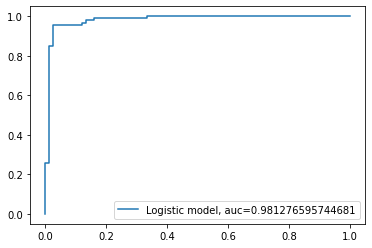

0.93
0.4
0.98


In [8]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
score = roc_auc_score( y_test, y_pred)
print(score)
y_pred_proba = grid.predict_proba(X_test)[:,1]
print(y_pred_proba[0])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(round(score,2))
print(round(y_pred_proba[0],2))
print(round(roc_auc,2))

In [9]:
import pickle as clk
clk.dump(grid,open('fertility_model.h5',mode = 'wb'))

In [10]:
filename = '/content/fertility_model.h5'
loaded_model = clk.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)
y_pred1 = loaded_model.predict(X_test)
print(y_pred1)

0.9349112426035503
[0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0]


In [11]:
a = input()
b = input()
c = input()
d = input()
e = input()
#X_test3 = np.array([[138 ,  8.6,  560,  7.46,  0.62]])
X_test3 = np.array([[a ,  b,  c,  d,  e]])
X_test4 = normalizer.transform(X_test3)
print(X_test4)
#X_test1.reshape(1,5)
#print(X_test3)
print(X_test4.shape)

138
8.6
560
7.46
0.62
[[0.35579515 0.04753962 0.62671233 0.67628866 0.65822785]]
(1, 5)


In [12]:
y_pred3 = loaded_model.predict(X_test4)
print(y_pred3)

[0]
